## 1. Plotting the Data

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(context="notebook", style="whitegrid", palette="dark")

In [20]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


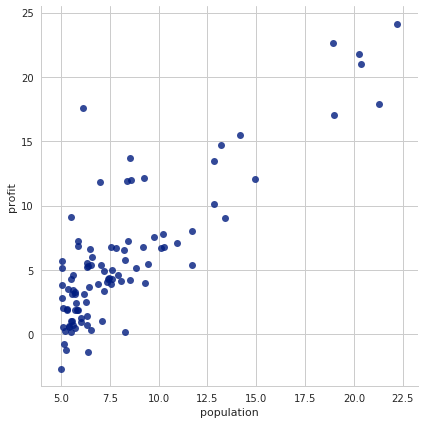

In [21]:
# 输出样本文件分布图
%matplotlib inline
sns.lmplot('population', 'profit', data, size=6, fit_reg=False)

## 2. Gradient Descent

![avatar](img/1.png)

In [22]:
# 代价函数
def cost(theta, X, Y):
    """
    @param X: 样本集; m*n的矩阵，m为样本个数，n为样本特征个数，其中x0 = 1
    @param Y: 样本结果;m*1的矩阵，
    @param theta: 带求解的最佳θ; 1*n的矩阵
    """
    m, n = np.shape(X)
    # h(x^i) - y^i
    inner = np.dot(X, theta.T) - Y
    squareSum = np.dot(inner.T, inner)
    return squareSum / (2 * m)
    

![avatar](img/2.png)

In [37]:
# 梯度函数
def gradient(theta, X, Y):
    m, n = np.shape(X)
    inner = np.dot(X, theta.T) - Y
    # xj^1 * inner^1 + xj^2 * inner^2 + ... + xj^m * inner^m
    val = np.dot(X.T, inner)  # val为n*1的矩阵
    return val.T / m


# 梯度下降
def gradientDecent(theta, X, Y, alpha, times):
    """
    @param alpha: 学习率
    @param times: 重复次数
    """
    for i in range(times):
        theta = theta - alpha * gradient(theta, X, Y)
        c = cost(theta, X, Y)
        print "%d: theta=%s, cost=%f" %(i, theta, c.item())
    return theta

0: theta=[[ 0.05839135  0.6532885 ]], cost=6.737190
1: theta=[[ 0.06289175  0.77000978]], cost=5.931594
2: theta=[[ 0.05782293  0.79134812]], cost=5.901155
3: theta=[[ 0.05106363  0.79572981]], cost=5.895229
4: theta=[[ 0.04401438  0.79709618]], cost=5.890095
5: theta=[[ 0.03692413  0.79792547]], cost=5.885004
6: theta=[[ 0.02983712  0.79865824]], cost=5.879932
7: theta=[[ 0.02276118  0.79937279]], cost=5.874879
8: theta=[[ 0.0156977   0.80008305]], cost=5.869844
9: theta=[[ 0.0086469  0.8007915]], cost=5.864827
10: theta=[[ 0.00160879  0.80149857]], cost=5.859828
11: theta=[[-0.00541662  0.80220436]], cost=5.854847
12: theta=[[-0.01242938  0.80290886]], cost=5.849884
13: theta=[[-0.01942949  0.8036121 ]], cost=5.844939
14: theta=[[-0.02641699  0.80431407]], cost=5.840011
15: theta=[[-0.03339189  0.80501478]], cost=5.835102
16: theta=[[-0.04035421  0.80571422]], cost=5.830210
17: theta=[[-0.04730399  0.8064124 ]], cost=5.825336
18: theta=[[-0.05424124  0.80710932]], cost=5.820479
19: t

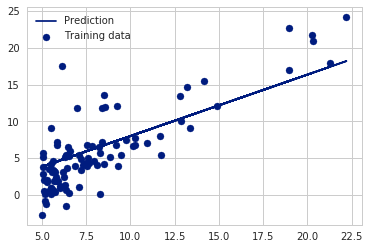

In [47]:
def main1():
    # 获取X，并设置x0=1
    ones = pd.DataFrame({'ones': np.ones(len(data))})
    X = pd.concat([ones, data], axis=1).iloc[:, :-1].as_matrix()
    # 获取Y
    Y = data.iloc[:, -1:].as_matrix()
    # 初始化theta
    theta = np.zeros((1, X.shape[1]))
    # 初始化alpha
    alpha = 0.01
    final_theta = gradientDecent(theta, X, Y, alpha, 60)[0]
    
    plt.scatter(data.population, data.profit, label="Training data")
    plt.plot(data.population, data.population*final_theta[1] + final_theta[0], label="Prediction")
    plt.legend(loc=2)

    
    
main1()

## 3. Linear regression with multiple variables

![avatar](img/3.png)


In [50]:
data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])
data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [55]:
# 使用方法二进行特征归一
def normalizeFeatures(data):
    return data.apply(lambda column: (column - column.mean()) / column.std())


data = normalizeFeatures(data)
data.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [71]:
def main2():
    # 获取X, 设置x0 = 1
    ones = pd.DataFrame({'ones': np.ones(len(data))})
    X = pd.concat([ones, data], axis=1).iloc[:, :-1].as_matrix()
    # 获取Y
    Y = data.iloc[:, -1:].as_matrix()
    # 初始化theta
    theta = np.zeros((1, X.shape[1]))
    # 初始化alpha
    alpha = 0.01
    final_theta = gradientDecent(theta, X, Y, alpha, 500)[0]
    return final_theta
    
final_theta = main2()

0: theta=[[ -8.74005360e-19   8.36796367e-03   4.32851306e-03]], cost=0.480549
1: theta=[[ -1.77163249e-18   1.66303056e-02   8.56880107e-03]], cost=0.471986
2: theta=[[ -2.69288138e-18   2.47885430e-02   1.27223064e-02]], cost=0.463665
3: theta=[[ -3.59050851e-18   3.28441704e-02   1.67904489e-02]], cost=0.455578
4: theta=[[ -4.39364857e-18   4.07986599e-02   2.07746264e-02]], cost=0.447719
5: theta=[[ -5.19678863e-18   4.86534616e-02   2.46762151e-02]], cost=0.440082
6: theta=[[ -5.97630692e-18   5.64100037e-02   2.84965695e-02]], cost=0.432659
7: theta=[[ -6.87393405e-18   6.40696932e-02   3.22370232e-02]], cost=0.425444
8: theta=[[ -7.91329177e-18   7.16339158e-02   3.58988891e-02]], cost=0.418431
9: theta=[[ -8.78729713e-18   7.91040367e-02   3.94834595e-02]], cost=0.411614
10: theta=[[ -9.75578956e-18   8.64814003e-02   4.29920067e-02]], cost=0.404987
11: theta=[[ -1.06770384e-17   9.37673313e-02   4.64257830e-02]], cost=0.398545
12: theta=[[ -1.15038003e-17   1.00963134e-01   4.

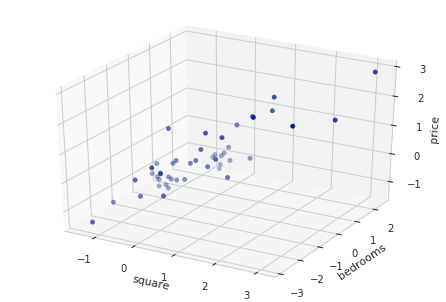

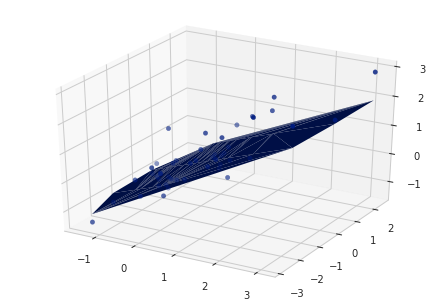

In [70]:
from mpl_toolkits.mplot3d import Axes3D

# 获取X, 设置x0 = 1
ones = pd.DataFrame({'ones': np.ones(len(data))})
X = pd.concat([ones, data], axis=1).iloc[:, :-1].as_matrix()
# 获取Y
Y = data.iloc[:, -1:].as_matrix()
fig = plt.figure()
ax = Axes3D(fig)
x1 = X[:, 1]
x2 = X[:, 2]
y = Y[:, 0]

# 样本数据
ax.scatter(x1, x2, y)
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.show()

# 样本数据+回归模型
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, x2, y)
y_ = x1 * final_theta[1] + x2 * final_theta[2] + final_theta[0]
ax.plot_trisurf(x1, x2, y_, linewidth=0.2, antialiased=True)
plt.show()

## 用矩阵计算theta 
![avatar](img/4.png)

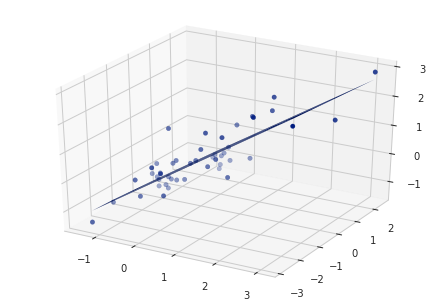

In [66]:
def lineRegression(X, Y):
    # 逆矩阵
    v = np.linalg.inv(np.dot(X.T, X))
    theta = np.dot(np.dot(v, X.T), Y)
    return theta

final_theta = lineRegression(X, Y)
# 样本数据+回归模型
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, x2, y)
y_ = x1 * final_theta[1] + x2 * final_theta[2] + final_theta[0]
ax.plot_trisurf(x1, x2, y_, linewidth=0.2, antialiased=True)
plt.show()